# Uniform Manifold Approximation and Projection (UMAP)

✅간략한 설명
* 서로 먼 데이터는 더 멀리, 가까운 데이터는 더 가깝게 만드는 방법이다. 
* 그래프 레이아웃 알고리즘을 이용해서 고차원에서의 각 데이터의 graph 관계를 저차원으로 임베딩 했을 때도 유사하게 잘 유지가 될 수 있도록 학습한다. 
<br/> 

✅장점
* t-SNE와 유사하나 전혀 다른 수학적 원리를 기반으로 하여 t-SNE보다 더 global한 데이터의 분포를 학습할 수 있음
* t-SNE에 비해 UMAP을 사용했을 때 결과를 가시화하는 시간이 현저히 빨라짐 
<br/>

**자세한 설명은 [README](https://github.com/Moonmoonji/Business_Analytics-2022-/blob/main/Dimensionality_Reduction/README.md)에 나와있습니다** 👌 

✅튜토리얼 구성
* MNIST 데이터에 UMAP 적용한 후 3차원으로 확인 
* 하이퍼파라미터 변경해보며 결과 비교해보기 

### 라이브러리 불러오기 

In [17]:
# 데이터 조작 라이브러리 
import pandas as pd 
import numpy as np 

# 시각화 라이브러리 
import plotly.express as px #데이터 시각화 위한 패키지 
import matplotlib.pyplot as plt #손글씨 시각화 위해서 
import chart_studio
import chart_studio.plotly as py 
from IPython.display import Image

# Sklearn
from sklearn.datasets import load_digits # Mnist 데이터
from sklearn.model_selection import train_test_split

# UMAP 차원 축소 라이브러리
from umap import UMAP 

### 데이터 불러오기 및 시각화 

Shape of digit images :  (1797, 8, 8)
Shape of X (main data): (1797, 64)
Shape of y (true labels): (1797,)


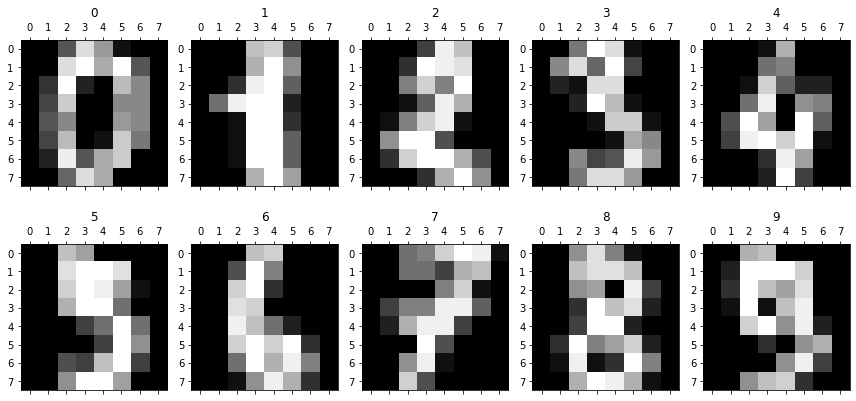

In [5]:
# MNIST 데이터 불러오기 
digits = load_digits()

# MINST 데이터 (이미지 당 64픽셀)와 실제 레이블이 포함된 배열 불러오기 
X,y = load_digits(return_X_y=True) 

print("Shape of digit images : ", digits.images.shape)
print('Shape of X (main data):',X.shape)
print('Shape of y (true labels):', y.shape)

# 처음 10개 이미지 보여주기 
fig, axs = plt.subplots(2,5,sharey = False, tight_layout=True,figsize=(12,6), facecolor='white')
n = 0
plt.gray() 

for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(digits.images[n])
        axs[i,j].set(title=y[n])
        n = n+1 

plt.show()


### 3D 시각화 함수 구현

In [15]:
def chart(X,y) : 
    #--------------------------------------------------------------------------#
    # label별로 데이터 정렬하는 섹션
    # 여러 그래프에서 숫자에 대한 일관된 색상 유지하는데 필요

    # X,y 결합하기 
    arr_concat = np.concatenate((X,y.reshape(y.shape[0],1)),axis=1)

    # Pandas 데이터프레임 만드릭 
    df = pd.DataFrame(arr_concat, columns = ['x','y','z','label'])

    # label 데이터를 float -> integer로 변경 
    df['label'] = df['label'].astype(int) 

    # label 별로 정렬 
    df.sort_values(by='label',axis=0, ascending=True,inplace=True) 
    #--------------------------------------------------------------------------#

    #--------------------------------------------------------------------------#
    # 3D 그래프 생성 및 업데이트 섹션 

    # 3D graph 생성 
    fig = px.scatter_3d(df,x='x',y='y',z='z',color=df['label'].astype(str),height=900,width=950)

    # Chart 모양 업데이트 
    fig.update_layout(title_text='UMAP',
                      showlegend=True,
                      legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                      scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                            center=dict(x=0, y=0, z=-0.1),
                                            eye=dict(x=1.5, y=-1.4, z=0.5)),
                                            margin=dict(l=0, r=0, b=0, t=0),
                      scene = dict(xaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             ),
                                   yaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                              ),
                                   zaxis=dict(backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             )))

    
    # marker size update 
    fig.update_traces(marker=dict(size=3,line=dict(color='black',width=0.1)))

    fig.show()
    #--------------------------------------------------------------------------#
 

### 데이터에 UMAP 적용 (파라미터 고정)

🎯 하이퍼파라미터 설명
* local_connectivity (default = 1) : 각 점이 적어도 하나의 다른 점에 연결된다는 것이 100% 확실
* n_neighbors (default = 15) : n_neighbors가 15로 설정된 경우 UMAP가 그래프를 구성할 때 사용하는 로컬 영역 밖에 있기 때문에 점이 16번째 이상의 인접 영역에 직접 연결될 확률은 0%이다. 
* min_dist (default = 0.1): 포함된 점 사이의 유효 최소 거리

In [7]:
# UMAP 하이퍼파라미터 세팅 
reducer = UMAP(n_neighbors=100, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
               n_components=3, # default 2, The dimension of the space to embed into.
               metric='euclidean', # default 'euclidean', The metric to use to compute distances in high dimensional space.
               n_epochs=1000, # default None, The number of training epochs to be used in optimizing the low dimensional embedding. Larger values result in more accurate embeddings. 
               learning_rate=1.0, # default 1.0, The initial learning rate for the embedding optimization.
               init='spectral', # default 'spectral', How to initialize the low dimensional embedding. Options are: {'spectral', 'random', A numpy array of initial embedding positions}.
               min_dist=0.1, # default 0.1, The effective minimum distance between embedded points.
               spread=1.0, # default 1.0, The effective scale of embedded points. In combination with ``min_dist`` this determines how clustered/clumped the embedded points are.
               low_memory=False, # default False, For some datasets the nearest neighbor computation can consume a lot of memory. If you find that UMAP is failing due to memory constraints consider setting this option to True.
               set_op_mix_ratio=1.0, # default 1.0, The value of this parameter should be between 0.0 and 1.0; a value of 1.0 will use a pure fuzzy union, while 0.0 will use a pure fuzzy intersection.
               local_connectivity=1, # default 1, The local connectivity required -- i.e. the number of nearest neighbors that should be assumed to be connected at a local level.
               repulsion_strength=1.0, # default 1.0, Weighting applied to negative samples in low dimensional embedding optimization.
               negative_sample_rate=5, # default 5, Increasing this value will result in greater repulsive force being applied, greater optimization cost, but slightly more accuracy.
               transform_queue_size=4.0, # default 4.0, Larger values will result in slower performance but more accurate nearest neighbor evaluation.
               a=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               b=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               random_state=42, # default: None, If int, random_state is the seed used by the random number generator;
               metric_kwds=None, # default None) Arguments to pass on to the metric, such as the ``p`` value for Minkowski distance.
               angular_rp_forest=False, # default False, Whether to use an angular random projection forest to initialise the approximate nearest neighbor search.
               target_n_neighbors=-1, # default -1, The number of nearest neighbors to use to construct the target simplcial set. If set to -1 use the ``n_neighbors`` value.
               #target_metric='categorical', # default 'categorical', The metric used to measure distance for a target array is using supervised dimension reduction. By default this is 'categorical' which will measure distance in terms of whether categories match or are different. 
               #target_metric_kwds=None, # dict, default None, Keyword argument to pass to the target metric when performing supervised dimension reduction. If None then no arguments are passed on.
               #target_weight=0.5, # default 0.5, weighting factor between data topology and target topology.
               transform_seed=42, # default 42, Random seed used for the stochastic aspects of the transform operation.
               verbose=False, # default False, Controls verbosity of logging.
               unique=False, # default False, Controls if the rows of your data should be uniqued before being embedded. 
              )

# Data에 피팅 
# UMAP을 통해 차원이 (1797,64)인 X를 (1797,3)으로 축소시킴 
X_trans = reducer.fit_transform(X) 

# 피팅된 데이터 shape 확인
print('Shape of X_trans: ', X_trans.shape)

Shape of X_trans:  (1797, 3)


#### Plotting

In [16]:
chart(X_trans,y) 

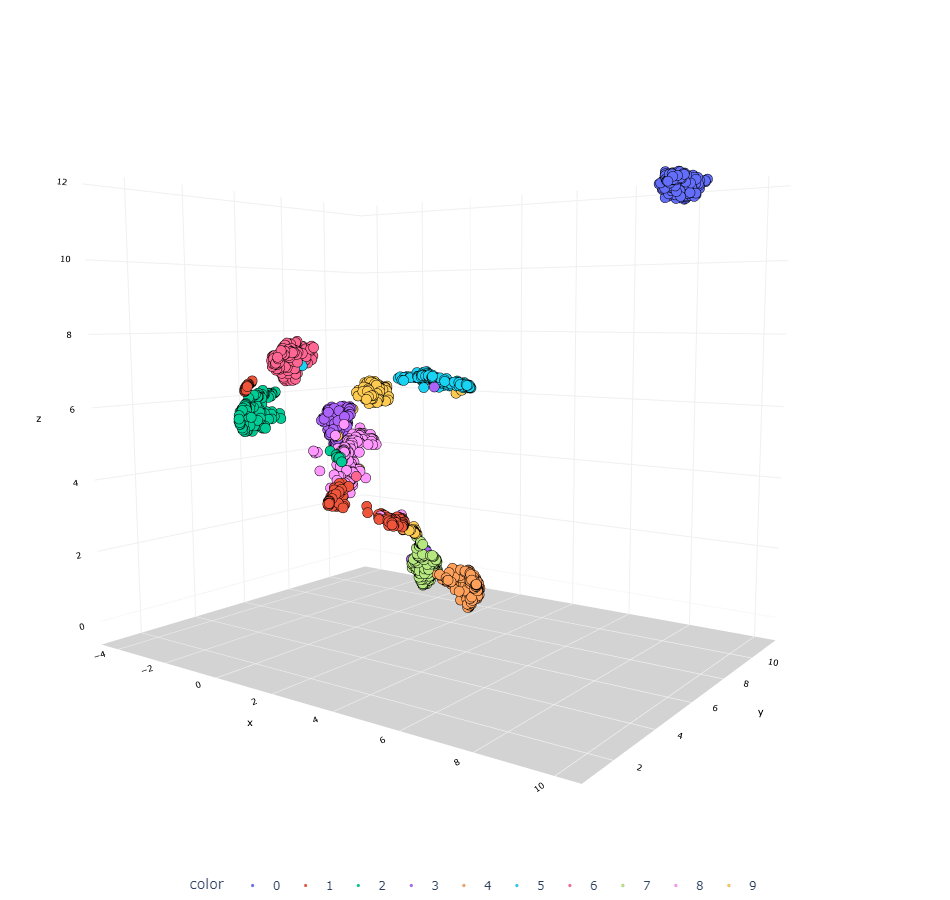

In [22]:
# (위의 3d 이미지는 github 업로드시에는 보이지 않아서 사진으로 첨부합니다. raw file 다운 받으면 3d 이미지 좌표 조절해가며 확인할 수 있습니다)
Image("umap3d.png")

## Hyperparameter 변경 해보기 

In [14]:
import umap.plot 
from umap.umap_ import nearest_neighbors

#--------------------------------------------------------------------------#
# 변경해볼 hyperparameter 

n_neighbors = [5,50,100,250]
min_dists = [0,0.2,0.5,0.9] 
#--------------------------------------------------------------------------#

precomputed_knn_embeddings = np.zeros((4,4,1797,2)) 

In [16]:
%%time

# n_neighbors=250으로 pretraining 시킴 
mnist_knn = nearest_neighbors(X,
                              n_neighbors=250,
                              metric="euclidean",
                              metric_kwds=None,
                              angular=False,
                              random_state=None,
                             )

# 앞에서 설정한 여러 n_neighbors와 min_dists에 대한 결과를 precomputed_knn_embeddings에 저장함 
for i, k in enumerate(n_neighbors):
    for j, dist in enumerate(min_dists):
        precomputed_knn_embeddings[i, j] = umap.UMAP(n_neighbors=k,
                                                      min_dist=dist,
                                                      precomputed_knn=mnist_knn,
                                                      ).fit_transform(X)
print("\033[1m"+"Time taken to compute UMAP on grid of parameters with precomputed_knn:\033[0m")

c:\Users\JiwonMoon\anaconda3\lib\site-packages\umap\umap_.py:1956: UserWarning:

precomputed_knn is meant for large datasets. Since your data is small, precomputed_knn will be ignored and the k-nn will be computed normally.

c:\Users\JiwonMoon\anaconda3\lib\site-packages\umap\umap_.py:1956: UserWarning:

precomputed_knn is meant for large datasets. Since your data is small, precomputed_knn will be ignored and the k-nn will be computed normally.

c:\Users\JiwonMoon\anaconda3\lib\site-packages\umap\umap_.py:1956: UserWarning:

precomputed_knn is meant for large datasets. Since your data is small, precomputed_knn will be ignored and the k-nn will be computed normally.

c:\Users\JiwonMoon\anaconda3\lib\site-packages\umap\umap_.py:1956: UserWarning:

precomputed_knn is meant for large datasets. Since your data is small, precomputed_knn will be ignored and the k-nn will be computed normally.

c:\Users\JiwonMoon\anaconda3\lib\site-packages\umap\umap_.py:1956: UserWarning:

precomputed_knn is 

Time taken to compute UMAP on grid of parameters with precomputed_knn:
CPU times: total: 7min 47s
Wall time: 56.3 s


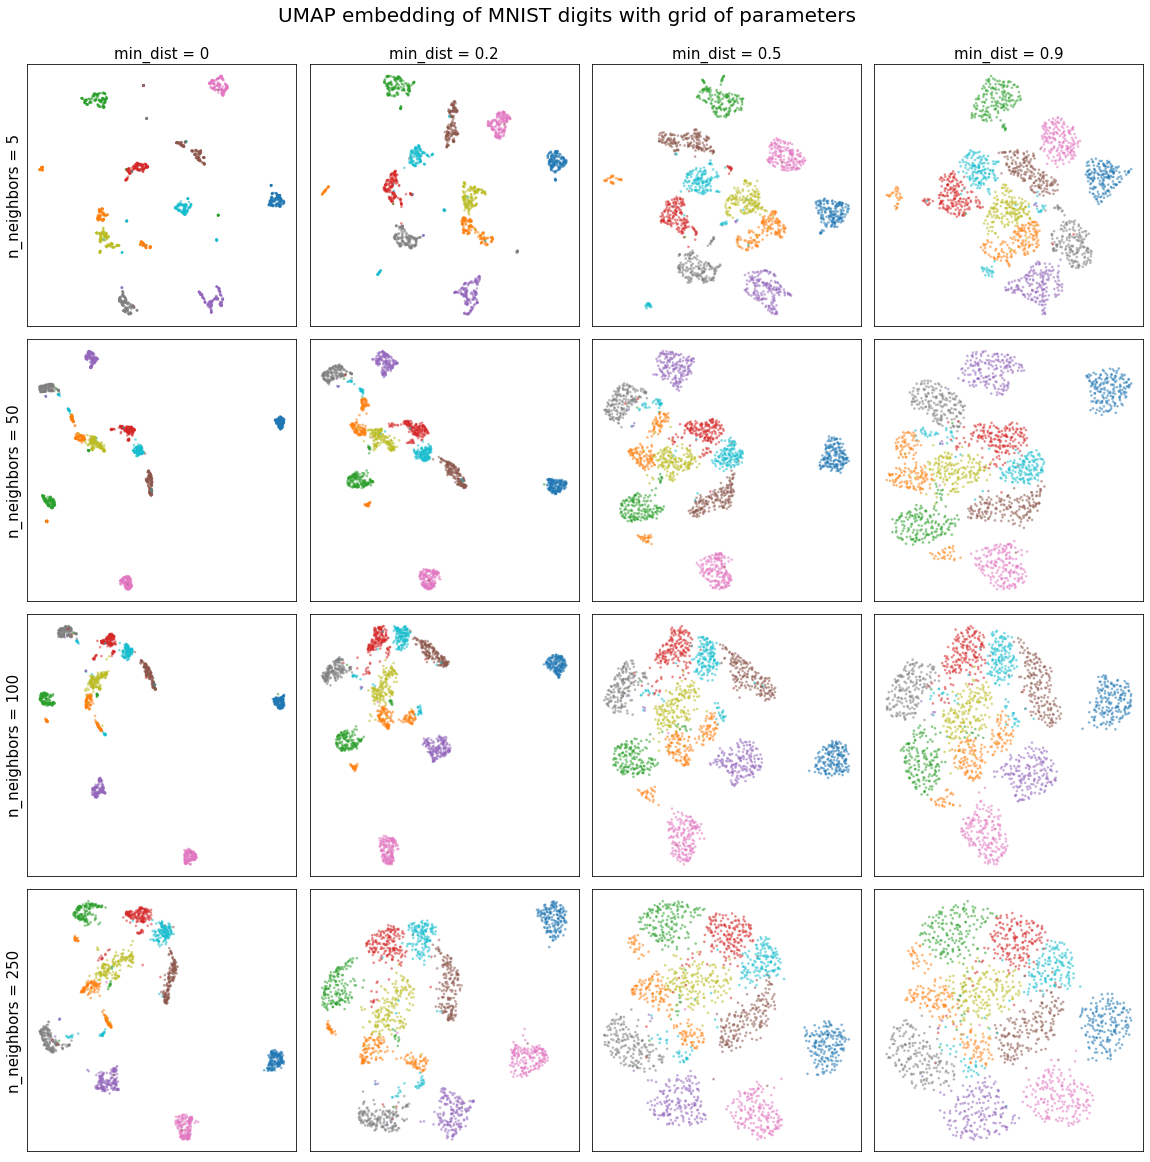

In [22]:
# 2차원으로 시각화 

fig, axs = plt.subplots(4, 4, figsize=(20, 20))

for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        ax.scatter(precomputed_knn_embeddings[i, j, :, 0],
                   precomputed_knn_embeddings[i, j, :, 1],
                   c=y / 9,
                   cmap='tab10',
                   alpha=0.4,
                   s=3,
                   )
        ax.set_xticks([])
        ax.set_yticks([])
        if i == 0:
            ax.set_title("min_dist = {}".format(min_dists[j]), size=15)
        if j == 0:
            ax.set_ylabel("n_neighbors = {}".format(n_neighbors[i]), size=15)
fig.suptitle("UMAP embedding of MNIST digits with grid of parameters", y=0.92, size=20)
plt.subplots_adjust(wspace=0.05, hspace=0.05)


💡 파라미터 변경에 따른 해석 💡
<br/> 

> min_dist 값이 낮을 수록 클러스터가 더 촘촘하게 채워지며, n_neigbors에는 모델이 강건한 것 처럼 보인다 (n_neighbors 변경에 따른 차이가 별로 없음)


(참고 링크)
<br/>
https://medium.com/towards-data-science/umap-dimensionality-reduction-an-incredibly-robust-machine-learning-algorithm-b5acb01de568 
<br/>
https://umap-learn.readthedocs.io/en/latest/precomputed_k-nn.html 
<br/>